In [3]:
# Load required packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [4]:
# load data googleplaystore.csv dataset
data = pd.read_csv('googleplaystore.csv')   
data.head()

App        Category  Rating  \
0     Photo Editor & Candy Camera & Grid & ScrapBook  ART_AND_DESIGN     4.1   
1                                Coloring book moana  ART_AND_DESIGN     3.9   
2  U Launcher Lite – FREE Live Cool Themes, Hide ...  ART_AND_DESIGN     4.7   
3                              Sketch - Draw & Paint  ART_AND_DESIGN     4.5   
4              Pixel Draw - Number Art Coloring Book  ART_AND_DESIGN     4.3   

  Reviews  Size     Installs  Type Price Content Rating  \
0     159   19M      10,000+  Free     0       Everyone   
1     967   14M     500,000+  Free     0       Everyone   
2   87510  8.7M   5,000,000+  Free     0       Everyone   
3  215644   25M  50,000,000+  Free     0           Teen   
4     967  2.8M     100,000+  Free     0       Everyone   

                      Genres      Last Updated         Current Ver  \
0               Art & Design   January 7, 2018               1.0.0   
1  Art & Design;Pretend Play  January 15, 2018               2.0.0   
2               Art & Design    August 1, 2018               1.2.4   
3               Art & Design      June 8, 2018  Varies with device   
4    Art & Design;Creativity     June 20, 2018                 1.1   

    Android Ver  
0  4.0.3 and up  
1  4.0.3 and up  
2  4.0.3 and up  
3    4.2 and up  
4    4.4 and up

In [5]:
data.dtypes

App                object
Category           object
Rating            float64
Reviews            object
Size               object
Installs           object
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

###### Data transformation/Exploratory data analysis

In [37]:
# Data cleaning

# Replace all NaN elements with 0 
data.fillna(0)

# Remove the $ sign in the price variable
# data['Price'] = data['Price'].str.replace('$', '')
data['Price'] = data['Price'].astype(str).str.replace("$", "")   

# Remove the + ign in the Installs variable
data['Installs'] = data['Installs'].astype(str).str.replace("+", "")  

# Remove the 'Everyone' sign in the price variable
data['Price'] = data['Price'].str.replace('Everyone', '')
data['Installs'] = data['Installs'].str.replace('Everyone', '')
data['Reviews'] = data['Reviews'].str.replace('Everyone', '')

# convert price to float
data['Price'] = pd.to_numeric(data['Price'],errors='coerce')
# data['Installs'] = pd.to_numeric(data['Installs'],errors='coerce')

# Convert the Installs column to float
# data['Installs'] = data['Installs'].astype(float)

# Replace the comma (,) with empty string
data['Installs'] = data['Installs'].str.replace(',', '')

# Replace 'Free' with 0
data['Installs'] = data['Installs'].replace('Free', 0.0)

# Convert the Installs column to float
data['Installs'] = data['Installs'].astype(float)



# Remove the M sign in the size variable
data['Size'] = data['Size'].astype(str).str.replace("M","")

# convert size to float
data['Size'] = pd.to_numeric(data['Size'],errors='coerce')

# check the data types after convertion
data.dtypes



c:\users\ben\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
c:\users\ben\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  # This is added back by InteractiveShellApp.init_path()


App                object
Category           object
Rating            float64
Reviews            object
Size              float64
Installs          float64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [38]:
# 1. What is the average rating for an App in the Google Play Store?

#1 Average Rating
avg_rating = data['Rating'].mean()
print('The Average Rating for an App in the Google Play Store is: ', avg_rating)
   

The Average Rating for an App in the Google Play Store is:  4.193338315362443


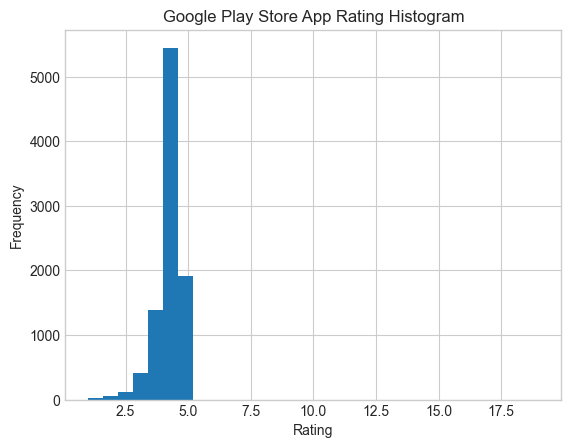

In [40]:
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

# Create a histogram
data['Rating'].hist(bins=30)
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Google Play Store App Rating Histogram')
plt.show()

In [41]:
# 2. What is the average size of an App in the Google Play Store?

#2 Average Size
avg_size = data['Size'].mean()
print('The Average Size of an App in the Google Play Store is: ', avg_size)


The Average Size of an App in the Google Play Store is:  22.270540265035677


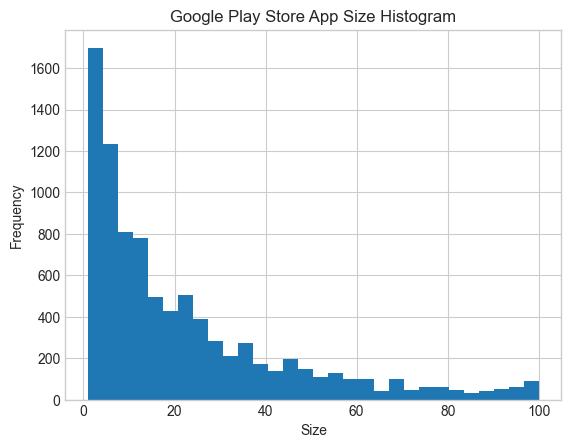

In [42]:
# Create a histogram
data['Size'].hist(bins=30)
plt.xlabel('Size')
plt.ylabel('Frequency')
plt.title('Google Play Store App Size Histogram')
plt.show()

In [43]:
# 3. What is the most popular category of App in the Google Play Store?

#3 Most Popular Category
most_popular_cat = data['Category'].mode()
print('The Most Popular Category of App in the Google Play Store is: ', most_popular_cat)


The Most Popular Category of App in the Google Play Store is:  0    FAMILY
dtype: object


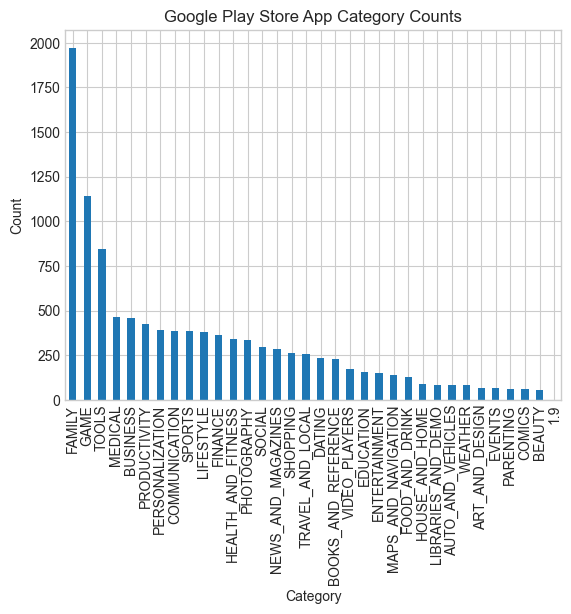

In [44]:
import matplotlib.pyplot as plt

# Get the value counts of the categorical variables
category_counts = data['Category'].value_counts()

# Create a bar chart
category_counts.plot(kind='bar')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Google Play Store App Category Counts')
plt.show()

In [45]:
# What is the average price of an App in the Google Play Store?

#4 Average Price
avg_price = data['Price'].mean()
print('The Average Price of an App in the Google Play Store is: ', avg_price)
  

The Average Price of an App in the Google Play Store is:  1.027368081180812


In [46]:
# What is the most popular content rating for an App in the Google Play Store?

#5 Most Popular Content Rating
most_popular_con_rating = data['Content Rating'].mode()
print('The Most Popular Content Rating for an App in the Google Play Store is: ', most_popular_con_rating)          

The Most Popular Content Rating for an App in the Google Play Store is:  0    Everyone
dtype: object


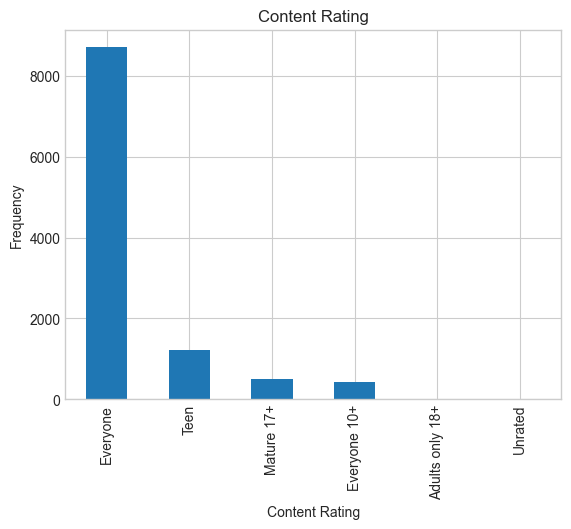

In [47]:
# Create a histogram
data['Content Rating'].value_counts().plot(kind='bar', title='Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Frequency')
plt.show()

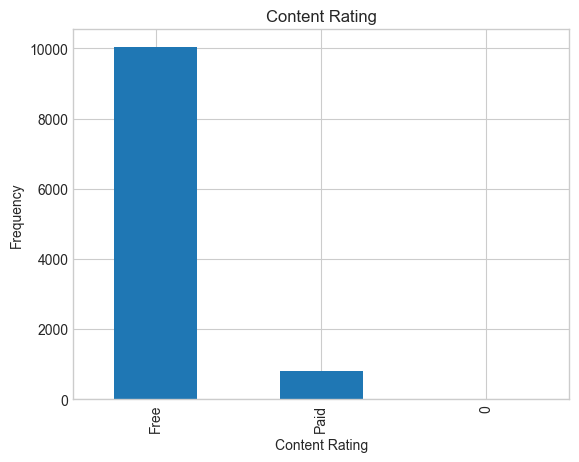

In [48]:

# Create a histogram
data['Type'].value_counts().plot(kind='bar', title='Content Rating')
plt.xlabel('Content Rating')
plt.ylabel('Frequency')
plt.show()

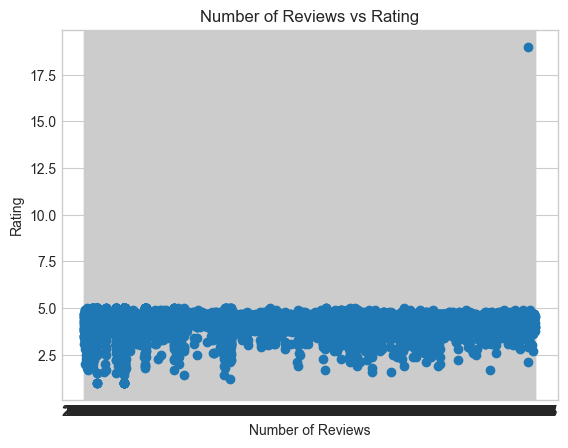

In [49]:
# How does the number of reviews for an App in the Google Play Store correlate with the rating?

plt.scatter(data["Reviews"], data["Rating"])
plt.xlabel("Number of Reviews")
plt.ylabel("Rating")
plt.title("Number of Reviews vs Rating")
plt.show()

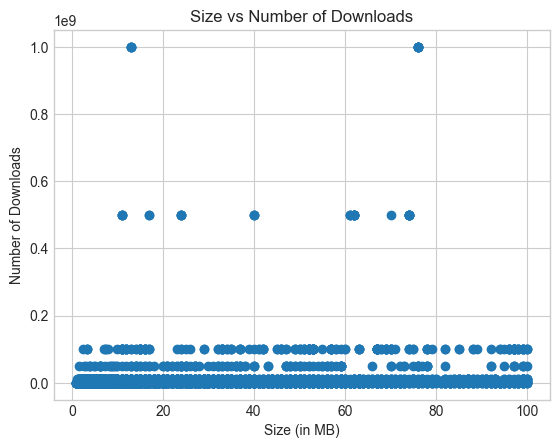

In [50]:
# How does the size of an App in the Google Play Store correlate with the number of downloads?

plt.scatter(data["Size"], data["Installs"])
plt.xlabel("Size (in MB)")
plt.ylabel("Number of Downloads")
plt.title("Size vs Number of Downloads")
plt.show()

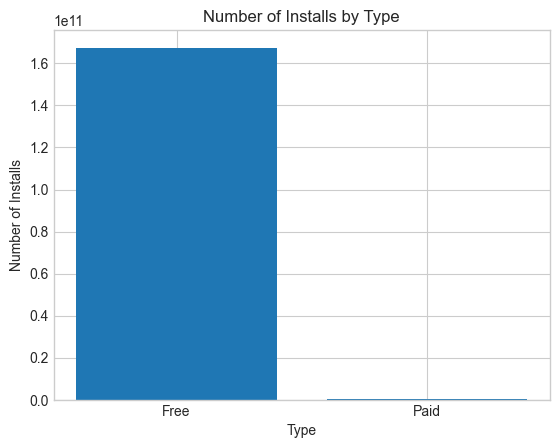

In [51]:
## Number of App Installs by Type(Free/Paid)

# Get the required columns from the dataset
installs = data['Installs']
types = data['Type']

# Create lists for each type
free_installs = []
paid_installs = []

# Append install values to correct list
for i in range(len(installs)):
    if types[i] == "Free":
        free_installs.append(installs[i])
    else:
        paid_installs.append(installs[i])

# Create a bar chart
plt.bar(["Free", "Paid"], [sum(free_installs), sum(paid_installs)])
plt.title("Number of Installs by Type")
plt.xlabel("Type")
plt.ylabel("Number of Installs")

# Show chart
plt.show()

###### Models and analysis                       

In [ ]:
 # Predictive:
    
# 1. What is the prediction for the number of reviews of an App in the Google Play Store based on its 
# size, category, price, and content rating?

# Model 1: Predicting Reviews
# Import necessary packages
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

# Get the features and labels
X = data[['Size', 'Category', 'Price', 'Content Rating']]
y = data['Reviews']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fit the model
model = LinearRegression()
# model.fit(X_train, y_train)

# Predict using the model
# y_pred = model.predict(X_test)


In [ ]:
# 3. What is the prediction for the number of installs of an App in the Google Play Store based on its 
# size, category, price, and content rating?

# Model 3: Predicting Installs
# Import necessary packages
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression

# Get the features and labels
X = data[['Size', 'Price']]
y = data['Installs']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Fit the model
model = LinearRegression()
# model.fit(X_train, y_train)

# Predict using the model
# y_pred = model.predict(X_test)

